In [2]:
from sympy import *
import matplotlib.pyplot as plt
import numpy as np

phi, phi_0, r_tsa, L_tsa0 = symbols('phi, phi_0, r_tsa, L_tsa0') #twisted string params
x_tsa, r1, r2, r12, r3, theta3 = symbols('x_tsa, r1, r2, r12, r3, theta3') #linkage params
k, F_spr0 = symbols('k, F_spr0') #spring params


# guess = [0.000128, 20, 0.0516, 9.46, 4.6, 0.0263, 0.015, 0.01906, -1.327, 0.0256, 0.0244]
guess = [
    0.00022327413749841384, 
    21, 
    0.07202306, 
    9.4759629, 
    4.586, 
    0.038238, 
    0.15212, 
    0.18796, 
    0, 
    0.033646, 
    0.113887
]
nums = {
    r_tsa: guess[0],
    phi_0: guess[1],
    L_tsa0: guess[2],
    F_spr0: guess[3],
    k: guess[4],
    r1: guess[5],
    r2: guess[6],
    r3: guess[7],
    theta3: guess[8],
    x_tsa: guess[9],
    r12: guess[10]
}

t_total, omega_max = symbols('t_total, omega_max')
params = {
    t_total: 0.2,
    omega_max: 3000
}

L_tsa = sqrt(L_tsa0**2 - (phi + phi_0)**2 * r_tsa**2)

theta1 = acos((-r1**2 - x_tsa**2 + L_tsa**2) / (2*r1*x_tsa))
theta2 = theta1 - acos((r1**2 + r2**2 - r12**2) / (2*r1*r2))

L_spr = sqrt(r2**2 + r3**2 - 2*r2*r3*cos(theta2 - theta3))
L_spr
display(Eq(symbols('L_spr'), L_spr))

Eq(L_spr, sqrt(r2**2 - 2*r2*r3*cos(theta3 + acos((r1**2 - r12**2 + r2**2)/(2*r1*r2)) - acos((L_tsa0**2 - r1**2 - r_tsa**2*(phi + phi_0)**2 - x_tsa**2)/(2*r1*x_tsa))) + r3**2))

In [10]:
print(latex(L_spr))

\sqrt{r_{2}^{2} - 2 r_{2} r_{3} \cos{\left(\theta_{3} + \operatorname{acos}{\left(\frac{r_{1}^{2} - r_{12}^{2} + r_{2}^{2}}{2 r_{1} r_{2}} \right)} - \operatorname{acos}{\left(\frac{L_{tsa0}^{2} - r_{1}^{2} - r_{tsa}^{2} \left(\phi + \phi_{0}\right)^{2} - x_{tsa}^{2}}{2 r_{1} x_{tsa}} \right)} \right)} + r_{3}^{2}}


In [3]:
L_dspr = L_spr - L_spr.subs(phi,0)
L_dspr

sqrt(r2**2 - 2*r2*r3*cos(theta3 + acos((r1**2 - r12**2 + r2**2)/(2*r1*r2)) - acos((L_tsa0**2 - r1**2 - r_tsa**2*(phi + phi_0)**2 - x_tsa**2)/(2*r1*x_tsa))) + r3**2) - sqrt(r2**2 - 2*r2*r3*cos(theta3 + acos((r1**2 - r12**2 + r2**2)/(2*r1*r2)) - acos((L_tsa0**2 - phi_0**2*r_tsa**2 - r1**2 - x_tsa**2)/(2*r1*x_tsa))) + r3**2)

In [4]:
F_out = k*L_dspr + F_spr0
F_out

F_spr0 + k*(sqrt(r2**2 - 2*r2*r3*cos(theta3 + acos((r1**2 - r12**2 + r2**2)/(2*r1*r2)) - acos((L_tsa0**2 - r1**2 - r_tsa**2*(phi + phi_0)**2 - x_tsa**2)/(2*r1*x_tsa))) + r3**2) - sqrt(r2**2 - 2*r2*r3*cos(theta3 + acos((r1**2 - r12**2 + r2**2)/(2*r1*r2)) - acos((L_tsa0**2 - phi_0**2*r_tsa**2 - r1**2 - x_tsa**2)/(2*r1*x_tsa))) + r3**2))

In [9]:
print(latex(Eq(symbols('T1'), L_spr.diff(phi))))

T_{1} = - \frac{r_{2} r_{3} r_{tsa}^{2} \cdot \left(2 \phi + 2 \phi_{0}\right) \sin{\left(\theta_{3} + \operatorname{acos}{\left(\frac{r_{1}^{2} - r_{12}^{2} + r_{2}^{2}}{2 r_{1} r_{2}} \right)} - \operatorname{acos}{\left(\frac{L_{tsa0}^{2} - r_{1}^{2} - r_{tsa}^{2} \left(\phi + \phi_{0}\right)^{2} - x_{tsa}^{2}}{2 r_{1} x_{tsa}} \right)} \right)}}{2 r_{1} x_{tsa} \sqrt{1 - \frac{\left(L_{tsa0}^{2} - r_{1}^{2} - r_{tsa}^{2} \left(\phi + \phi_{0}\right)^{2} - x_{tsa}^{2}\right)^{2}}{4 r_{1}^{2} x_{tsa}^{2}}} \sqrt{r_{2}^{2} - 2 r_{2} r_{3} \cos{\left(\theta_{3} + \operatorname{acos}{\left(\frac{r_{1}^{2} - r_{12}^{2} + r_{2}^{2}}{2 r_{1} r_{2}} \right)} - \operatorname{acos}{\left(\frac{L_{tsa0}^{2} - r_{1}^{2} - r_{tsa}^{2} \left(\phi + \phi_{0}\right)^{2} - x_{tsa}^{2}}{2 r_{1} x_{tsa}} \right)} \right)} + r_{3}^{2}}}


In [6]:
T1 = L_dspr.diff(phi)
T1

-r2*r3*r_tsa**2*(2*phi + 2*phi_0)*sin(theta3 + acos((r1**2 - r12**2 + r2**2)/(2*r1*r2)) - acos((L_tsa0**2 - r1**2 - r_tsa**2*(phi + phi_0)**2 - x_tsa**2)/(2*r1*x_tsa)))/(2*r1*x_tsa*sqrt(1 - (L_tsa0**2 - r1**2 - r_tsa**2*(phi + phi_0)**2 - x_tsa**2)**2/(4*r1**2*x_tsa**2))*sqrt(r2**2 - 2*r2*r3*cos(theta3 + acos((r1**2 - r12**2 + r2**2)/(2*r1*r2)) - acos((L_tsa0**2 - r1**2 - r_tsa**2*(phi + phi_0)**2 - x_tsa**2)/(2*r1*x_tsa))) + r3**2))

In [237]:
F_in = F_out*T1
F_in

-r2*r3*r_tsa**2*(F_spr0 + k*(sqrt(r2**2 - 2*r2*r3*cos(theta3 + acos((r1**2 - r12**2 + r2**2)/(2*r1*r2)) - acos((L_tsa0**2 - r1**2 - r_tsa**2*(phi + phi_0)**2 - x_tsa**2)/(2*r1*x_tsa))) + r3**2) - sqrt(r2**2 - 2*r2*r3*cos(theta3 + acos((r1**2 - r12**2 + r2**2)/(2*r1*r2)) - acos((L_tsa0**2 - phi_0**2*r_tsa**2 - r1**2 - x_tsa**2)/(2*r1*x_tsa))) + r3**2)))*(2*phi + 2*phi_0)*sin(theta3 + acos((r1**2 - r12**2 + r2**2)/(2*r1*r2)) - acos((L_tsa0**2 - r1**2 - r_tsa**2*(phi + phi_0)**2 - x_tsa**2)/(2*r1*x_tsa)))/(2*r1*x_tsa*sqrt(1 - (L_tsa0**2 - r1**2 - r_tsa**2*(phi + phi_0)**2 - x_tsa**2)**2/(4*r1**2*x_tsa**2))*sqrt(r2**2 - 2*r2*r3*cos(theta3 + acos((r1**2 - r12**2 + r2**2)/(2*r1*r2)) - acos((L_tsa0**2 - r1**2 - r_tsa**2*(phi + phi_0)**2 - x_tsa**2)/(2*r1*x_tsa))) + r3**2))

In [238]:
#maximize integral(F_in, phi) from 0 to ω_max*t_total/2
#under constraint 0 ≤ F_in ≤ F_max
# F_in = (k*L_dspr + F_spr0)*L_dspr.diff(phi)

energy = (F_spr0 + k*L_dspr)**2 / (2*k) #integral shortcut
energy

(F_spr0 + k*(sqrt(r2**2 - 2*r2*r3*cos(theta3 + acos((r1**2 - r12**2 + r2**2)/(2*r1*r2)) - acos((L_tsa0**2 - r1**2 - r_tsa**2*(phi + phi_0)**2 - x_tsa**2)/(2*r1*x_tsa))) + r3**2) - sqrt(r2**2 - 2*r2*r3*cos(theta3 + acos((r1**2 - r12**2 + r2**2)/(2*r1*r2)) - acos((L_tsa0**2 - phi_0**2*r_tsa**2 - r1**2 - x_tsa**2)/(2*r1*x_tsa))) + r3**2)))**2/(2*k)

In [239]:
energy_0 = energy.subs(phi,0) #energy_final - energy_0 is the energy stored
energy_final = energy.subs(phi, omega_max*t_total/2)
display(energy_0, energy_final)

F_spr0**2/(2*k)

(F_spr0 + k*(sqrt(r2**2 - 2*r2*r3*cos(theta3 + acos((r1**2 - r12**2 + r2**2)/(2*r1*r2)) - acos((L_tsa0**2 - r1**2 - r_tsa**2*(omega_max*t_total/2 + phi_0)**2 - x_tsa**2)/(2*r1*x_tsa))) + r3**2) - sqrt(r2**2 - 2*r2*r3*cos(theta3 + acos((r1**2 - r12**2 + r2**2)/(2*r1*r2)) - acos((L_tsa0**2 - phi_0**2*r_tsa**2 - r1**2 - x_tsa**2)/(2*r1*x_tsa))) + r3**2)))**2/(2*k)

In [240]:
F_in.subs(nums).subs(phi,0)

0.00392644395590547

In [241]:
energy_final.subs(nums).subs(params)

12.8699577844500

In [242]:
from sympy.codegen.ast import CodeBlock, Assignment

E_f, tau_a = symbols('E_f, tau_a')

code = CodeBlock(
    Assignment(E_f, energy_final),
    Assignment(tau_a, F_in),
).cse()

print(f"# {count_ops(code)} operations")
print(pycode(code))

# 100 operations
x0 = r_tsa**2
x1 = r1**2
x2 = x_tsa**2
x3 = -L_tsa0**2 + x1 + x2
x4 = (1/2)/r1
x5 = x4/x_tsa
x6 = r2**2
x7 = theta3 + math.acos(x4*(-r12**2 + x1 + x6)/r2)
x8 = r2*r3
x9 = 2*x8
x10 = r3**2 + x6
x11 = -math.sqrt(x10 - x9*math.cos(x7 - math.acos(x5*(-phi_0**2*x0 - x3))))
x12 = -x0*(phi + phi_0)**2 - x3
x13 = x7 - math.acos(x12*x5)
x14 = math.sqrt(x10 - x9*math.cos(x13))
E_f = (1/2)*(F_spr0 + k*(x11 + math.sqrt(x10 - x9*math.cos(x7 - math.acos(x5*(-x0*((1/2)*omega_max*t_total + phi_0)**2 - x3))))))**2/k
tau_a = -x0*x5*x8*(F_spr0 + k*(x11 + x14))*(2*phi + 2*phi_0)*math.sin(x13)/(x14*math.sqrt(1 - 1/4*x12**2/(x1*x2)))


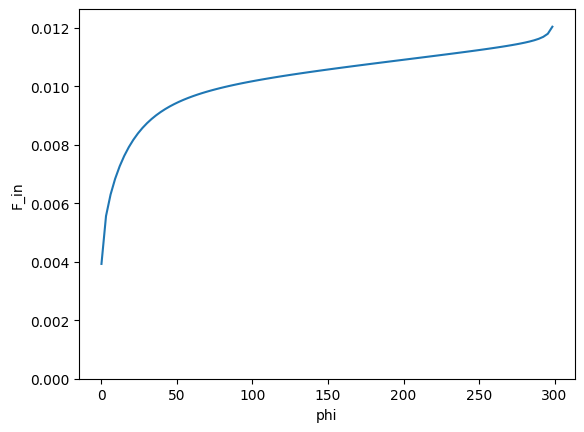

In [243]:
phi_max = float((L_tsa0/r_tsa - phi_0).subs(nums))
phi_vals = np.linspace(0, phi_max, 100, endpoint=False)

F_in_vals = [float(F_in.subs(nums).subs(phi, phi_val)) for phi_val in phi_vals]

plt.plot(phi_vals, F_in_vals)
plt.ylim(0, 1.05*max(F_in_vals))
plt.xlabel('phi')
plt.ylabel('F_in')
plt.show()

In [244]:
x = symbols('x')
f = Function('f')(x)

df = f.diff(x)
integrand = (k*f + F_spr0)*df
integrated = integrate(integrand, x)
display(f, df, f*df, integrand, integrated)

f(x)

Derivative(f(x), x)

f(x)*Derivative(f(x), x)

(F_spr0 + k*f(x))*Derivative(f(x), x)

Piecewise(((F_spr0 + k*f(x))**2/(2*k), Ne(k, 0)), (F_spr0*f(x), True))

In [245]:
x = symbols('x')
f = Function('f')(x)

df = f.diff(x)
fdf = (k*f + F_spr0)*df
diffed = fdf.diff(x)
display(f, df, fdf, diffed)

f(x)

Derivative(f(x), x)

(F_spr0 + k*f(x))*Derivative(f(x), x)

k*Derivative(f(x), x)**2 + (F_spr0 + k*f(x))*Derivative(f(x), (x, 2))

In [246]:
F_in_diff = symbols("F_in_diff")
code = CodeBlock(Assignment(F_in_diff, F_in.diff(phi))).cse()
print(count_ops(code))
print(pycode(code))


112
x0 = r_tsa**2
x1 = r1**2
x2 = x_tsa**2
x3 = -L_tsa0**2 + x1 + x2
x4 = -x0*(phi + phi_0)**2 - x3
x5 = 1/x_tsa
x6 = 1/r1
x7 = (1/2)*x6
x8 = x5*x7
x9 = r2**2
x10 = theta3 + math.acos(x7*(-r12**2 + x1 + x9)/r2)
x11 = x10 - math.acos(x4*x8)
x12 = math.cos(x11)
x13 = r2*r3
x14 = 2*x13
x15 = r3**2
x16 = x15 + x9
x17 = -x12*x14 + x16
x18 = math.sin(x11)
x19 = (1/4)/(x1*x2)
x20 = -x19*x4**2 + 1
x21 = r_tsa**4*(2*phi + 2*phi_0)**2
x22 = x19*x21/x20
x23 = x15*x18**2*x22*x9
x24 = math.sqrt(x17)
x25 = F_spr0 + k*(x24 - math.sqrt(-x14*math.cos(x10 - math.acos(x8*(-phi_0**2*x0 - x3))) + x16))
x26 = x13*x25/x24
x27 = x18*x26
F_in_diff = k*x23/x17 - x0*x27*x5*x6/math.sqrt(x20) + x12*x22*x26 - x23*x25/x17**(3/2) + (1/8)*x21*x27*x4/(r1**3*x20**(3/2)*x_tsa**3)
